In [ ]:
import re, math
from collections import Counter

WORD = re.compile(r'\w+')

def get_cosine(vec1, vec2):
     intersection = set(vec1.keys()) & set(vec2.keys())
     numerator = sum([vec1[x] * vec2[x] for x in intersection])

     sum1 = sum([vec1[x]**2 for x in vec1.keys()])
     sum2 = sum([vec2[x]**2 for x in vec2.keys()])
     denominator = math.sqrt(sum1) * math.sqrt(sum2)

     if not denominator:
        return 0.0
     else:
        return float(numerator) / denominator

def text_to_vector(text):
     words = WORD.findall(text)
     return Counter(words)

text1 = 'This is a foo bar sentence .'
text2 = 'This sentence is similar to a foo bar sentence .'

vector1 = text_to_vector(text1)
vector2 = text_to_vector(text2)

cosine = get_cosine(vector1, vector2)

print('Cosine:', cosine)

In [ ]:
pip install tweepy

In [ ]:
import os
import pandas as pd
import tweepy as tw


In [ ]:
pip install python-twitter --user

In [ ]:
import twitter

In [ ]:
api = twitter.Api(consumer_key='5QUCmsZc97JKVhSW7UqB4PmGO',
                      consumer_secret='Szv1qILgFywnl1IbLakJDIqbt44unJOXWEWY7iZ2ksw6WZvDjx',
                      access_token_key='1159073576495923200-s1eAfxDF86zf9J7brJoe2CEFwU0UW0',
                      access_token_secret='sxA356gk2uPJFU5iIyoB2yKLUrAbnvZpSGV9cRtqzEWb7')

In [ ]:
users = api.GetFriends()
print([u.name for u in users])
timel=api.GetHomeTimeline()
tie2=api.GetUserTimeline(screen_name="MMitanshu")
for ti in tie2:
    print(ti)

In [ ]:
results = api.GetSearch(
    raw_query="q=twitter%20&result_type=recent&since=2014-07-19&count=100")
for res in results:
    print(res)

In [ ]:
results = api.GetSearch(raw_query="q=shiny pants&result_type=recent&since=2014-07-19",result_type='mixed')
for res in results:
    print(res)

In [ ]:
pip install beautifulsoup4

In [ ]:
from requests import get
url = 'https://twitter.com/search?q=shiny%20pants&src=typed_query'
response = get(url)
print(response.text)
from bs4 import BeautifulSoup
html_soup = BeautifulSoup(response.text, 'html.parser')

In [ ]:
movie_containers = html_soup.find_all('div')
print(type(movie_containers))
print(len(movie_containers))
for m in movie_containers:
    print(m)

In [ ]:
pip install -U selenium --user

In [ ]:
#tweet_mode used to get full text inplace of truncated
results = api.GetSearch(
    raw_query="q=holi%20&tweet_mode=extended",include_entities=True,result_type='recent')
for res in results:
    print(res)

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
#from selenium.common.exceptions import TimeOutException, NoSuchElementException
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup

import time
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import csv
import json
import logging

# path where the selenium driver is copied.
#for lab pc ashish
#driver_path = '/home/ashishranjan/chromedriver'
#for home pc ashish
# driver_path = '/home/ashish/Downloads/chromedriver'
#for lab pc anurag
driver_path = '/home/anurag.barfa/mywork/btp/chromedriver'
#for home pc anurag
# driver_path = '/home/anurag/Work/btp/BTP/chromedriver'
# This will open a new chrome session.

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument("--disable-notifications")
# https://stackoverflow.com/questions/53902507/unknown-error-session-deleted-because-of-page-crash-from-unknown-error-cannot
chrome_options.add_argument('--no-sandbox') 
chrome_options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome(executable_path = driver_path,options=chrome_options)
#driver.get("https://twitter.com/search?q=delhi%20election&src=typed_query")
query="test"
# driver.get("https://twitter.com/search?q="+query+"&src=typed_query")
driver.get("https://twitter.com/gautamkaulgud")
SCROLL_PAUSE_TIME = 9

# Get scroll height
last_height = driver.execute_script("return document.body.scrollHeight")
scroll_count=10 #number of times you want to scroll the page
tweet_boxes=[]
while True:
    # Scroll down to bottom
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

    # Wait to load page
    time.sleep(SCROLL_PAUSE_TIME)

    # Calculate new scroll height and compare with last scroll height
    new_height = driver.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height
    tutorial_soup = BeautifulSoup(driver.page_source, 'html.parser')
    tutorial_code_soup = tutorial_soup.find_all('div',attrs={'class':'css-1dbjc4n r-18u37iz r-thb0q2'})
    tweet = tutorial_soup.find_all('div',{'class':'css-1dbjc4n r-1iusvr4 r-16y2uox r-1777fci r-5f2r5o r-1mi0q7o'})
    tweet_boxes=tweet_boxes+tweet
    scroll_count=scroll_count-1
    print(scroll_count)
    if scroll_count==0:
        break
            
#tutorial_soup = BeautifulSoup(driver.page_source, 'html.parser')
# tutorial_code_soup1 = tutorial_soup.find_all('div',attrs={'class':'css-1dbjc4n r-18u37iz r-thb0q2'})
# for tweet in tutorial_code_soup1:
#     print(tweet)
# # tutorial_code_soup2 = tutorial_soup.find_all('ol',attrs={'id':'stream-items-id'})
# tutorial_code_soup2 = tutorial_soup.find_all('li',attrs={'class':'js-stream-item stream-item stream-item'})
# for tweet in tutorial_code_soup2:
#     print(tweet)

In [ ]:
tweetstemp=[]
 
for i in tweet_boxes:
    # Add to the new list
    # only if not present
    if i not in tweetstemp:
        tweetstemp.append(i)
tweet_boxes = tweetstemp
len(tweet_boxes)

In [67]:
import string
import re
 
from nltk.corpus import stopwords 
stopwords_english = stopwords.words('english')
 
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
 
from nltk.tokenize import TweetTokenizer
 
# Happy Emoticons
emoticons_happy = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
    '<3'
    ])
 
# Sad Emoticons
emoticons_sad = set([
    ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('
    ])
 
# all emoticons (happy + sad)
emoticons = emoticons_happy.union(emoticons_sad)
def clean_tweets(tweet):
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
 
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
 
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
 
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)
 
    tweets_clean = []    
    for word in tweet_tokens:
        if (word not in stopwords_english and # remove stopwords
              word not in emoticons and # remove emoticons
                word not in string.punctuation): # remove punctuation
            #tweets_clean.append(word)
            stem_word = stemmer.stem(word) # stemming word
            tweets_clean.append(stem_word)
 
    return tweets_clean
    

In [70]:
import re, math
from collections import Counter

WORD = re.compile(r'\w+')

def text_to_vector(text):
     words = WORD.findall(text)
     return Counter(words)

def cosine(tweet,query):
    vec1 = text_to_vector(tweet.lower())
    vec2 = text_to_vector(query.lower())
    intersection = set(vec1.keys()) & set(vec2.keys())
#     print(intersection)
    numerator = sum([vec1[x] * vec2[x] for x in intersection])
    sum1 = sum([vec1[x]**2 for x in vec1.keys()])
    sum2 = sum([vec2[x]**2 for x in vec2.keys()])
    denominator = math.sqrt(sum1) * math.sqrt(sum2)
    if not denominator:
        return 0.0
    else:
        return float(numerator) / denominator

def jaccard(tweet,query):
    vec1 = text_to_vector(tweet.lower())
    vec2 = text_to_vector(query.lower())
    intersection = set(vec1.keys()) & set(vec2.keys())
    union =set(vec1.keys()) | set(vec2.keys())
    return len(intersection)/len(union)

In [ ]:
def gettweet(box,query):
    tweet=box.findChildren('div',recursive=False)[1].text
    user=box.findChildren('div',recursive=False)[0].findChildren('div',recursive=False)[0].findChildren('div',recursive=False)[0].findChildren(recursive=False)[0].text
    date=box.findChildren('div',recursive=False)[0].findChildren('div',recursive=False)[0].findChildren('div',recursive=False)[0].findChildren(recursive=False)[2].attrs['title']
    likes = comments = retweet = 'None'
    span = box.find_all('div',{'class':'css-901oao r-1awozwy r-1re7ezh r-6koalj r-1qd0xha r-a023e6 r-16dba41 r-1h0z5md r-ad9z0x r-bcqeeo r-o7ynqc r-clp7b1 r-3s2u2q r-qvutc0'})
    likes = span[3].text
    retweet = span[2].text
    comments = span[1].text
    tags=[]
    mentions=[]
    urls=0
    for anchor in box.find_all('a'):
        #print(anchor.text+"######")
        if 'href' in anchor.attrs:
            if anchor.attrs['href'].split('/')[1]=='hashtag':
                tags.append(anchor.text)
            if anchor.attrs['href'].split(':')[0]=='https':
                urls=urls+1
        if len(anchor.text)>0 and anchor.text[0]=='@':
#             mentions.append(anchor.text)
            if not ('aria-haspopup' in anchor.attrs and anchor.attrs['aria-haspopup']=="false"):
                mentions.append(anchor.text)
        
    #print(tags)
    #print(mentions)
    cosine_similarity=cosine(tweet,query)*100
    multimedia_flag=0
    s = str(box.find('img'))
    if ((box.find('img') and s.find('format')!=-1 )  or box.find('video')):
        multimedia_flag=1  
    return tweet,likes,comments,retweet,user,date,tags,mentions,multimedia_flag,urls,cosine_similarity

In [ ]:
import csv
with open('data/sample_'+query+'.csv', mode='w') as sample:
    count=0
    sample_writer = csv.writer(sample, delimiter=',')
    sample_writer.writerow(['Query','Date','user','Tweet','Img_present','Likes','commnets','retweet','tags','mentions','url_count','length','cosine_similarity(%)'])
    for boxes in tweet_boxes:
        try:
            tweet,likes,comments,retweet,user,date,tags,mentions,multimedia_flag,urls,cosine_similarity = gettweet(boxes,query)
            sample_writer.writerow([query,date, user, tweet, multimedia_flag,likes,comments,retweet,",".join(tags),",".join(mentions),urls,len(tweet),cosine_similarity])
        except:
            pass

In [ ]:
# gettweet(tweet_boxes[1426],query)
try:
#     box=tweet_boxes[1426]
    gettweet(tweet_boxes[1426],query)
except:
    print(e)
# print(box.text)
# tweet=box.findChildren('div',recursive=False)[1].text
# user=box.findChildren('div',recursive=False)[0].findChildren('div',recursive=False)[0].findChildren('div',recursive=False)[0].findChildren(recursive=False)[0].text
# date=box.findChildren('div',recursive=False)[0].findChildren('div',recursive=False)[0].findChildren('div',recursive=False)[0].findChildren(recursive=False)[2].attrs['title']
# likes = comments = retweet = 'None'
# span = box.find_all('div',{'class':'css-901oao r-1awozwy r-1re7ezh r-6koalj r-1qd0xha r-a023e6 r-16dba41 r-1h0z5md r-ad9z0x r-bcqeeo r-o7ynqc r-clp7b1 r-3s2u2q r-qvutc0'})
# likes = span[3].text
# retweet = span[2].text
# comments = span[1].text

In [ ]:
pip install chainer==1.17.0 --user

In [ ]:
pip install tqdm --user


In [ ]:
pip install scipy


In [ ]:
pip install scikit-learn --user

In [ ]:
pip install h5py --user

In [72]:
# encoding: utf-8 
query='INDvAUS'
import csv
import matplotlib.pyplot as plt
from datetime import datetime, timezone
data=[] 
training_X=[]
training_Y=[]
with open('data/'+query+'.csv', mode='r',encoding='utf-8') as sample:
    sample_reader = csv.reader(sample, delimiter=',')
    title=['rank']
    for rank,row in enumerate(sample_reader):
        if rank==0:
            title=title+row
            data=[[] for x in title]
        else:
            data[0].append(rank)
            training_Y.append(rank)
            for i in range(0,len(row)):
                data[i+1].append(row[i])
            how_old=(datetime.now()-datetime.strptime(row[8], '%I:%M %p · %d %b %Y')).total_seconds()
            cos=cosine(" ".join(clean_tweets(row[7]))," ".join(clean_tweets(row[1])))*100
            jac=jaccard(" ".join(clean_tweets(row[7]))," ".join(clean_tweets(row[1])))*100
            training_X.append([int(row[3]), int(row[4]), int(row[5]), int(row[6]), int(how_old), int(row[9]), int(row[10]), int(row[11]), int(row[12]), int(row[15]), int(row[16]), int(cos), int(jac)])
print(title) 
print(type(training_X))

['rank', 'Query', 'username', 'created_at', 'verified', 'followers_count', 'friends_count', 'listed_count', 'tweet', 'date', 'Img_present', 'likes', 'comments', 'retweets', 'tags', 'mentions', 'sum_followers_mention', 'url_count']
<class 'list'>


'1:58 PM · 8 MAR 2020'

In [32]:

datetime_object = datetime.strptime('1:33 pm  8 Mar 2005', '%I:%M %p . %d %b %Y')
(datetime.now()-datetime_object).total_seconds()

473547456.590723

473511089.993827

In [36]:
import numpy as np
from sklearn import preprocessing

In [48]:
X = preprocessing.normalize(np.array(training_X))
y = preprocessing.normalize(np.array(training_Y).reshape(1, -1))[0]

In [ ]:
# from sklearn import preprocessing
# n=100000
# X =  np.random.rand(n,12)
# y =  np.random.rand(n)

In [ ]:
y

In [35]:
from learning2rank.rank import ListNet
Model = ListNet.ListNet()

  0%|          | 0/362 [00:00<?, ?it/s]/home/anurag/mlenv/lib/python3.6/site-packages/chainer/functions/math/exponential.py:47: RuntimeWarning: invalid value encountered in log
  return utils.force_array(numpy.log(x[0])),
/home/anurag/Work/btp/BTP/learning2rank/rank/ListNet.py:58: RuntimeWarning: invalid value encountered in greater
  ind = vec_true.data * vec_compare.data > 0
/home/anurag/mlenv/lib/python3.6/site-packages/chainer/functions/activation/relu.py:43: RuntimeWarning: invalid value encountered in greater
  return utils.force_array(gy[0] * (x[0] > 0)),
  2%|▏         | 7/362 [00:00<00:05, 67.44it/s]

load dataset
The number of data, train: 3613 validate: 638
prepare initialized model!
Start training and validation loop......
epoch 1


 38%|███▊      | 24/64 [00:00<00:00, 234.67it/s]

train mean loss=15.12846810778785


100%|██████████| 64/64 [00:00<00:00, 253.38it/s]
/home/anurag/Work/btp/BTP/learning2rank/rank/ListNet.py:107: RuntimeWarning: overflow encountered in power
  ideal_dcg += (2 ** y_true_sorted[i] - 1.) / np.log2(i + 2)
/home/anurag/Work/btp/BTP/learning2rank/rank/ListNet.py:111: RuntimeWarning: overflow encountered in power
  dcg += (2 ** y_true[argsort_indices[i]] - 1.) / np.log2(i + 2)
/home/anurag/Work/btp/BTP/learning2rank/rank/ListNet.py:112: RuntimeWarning: invalid value encountered in double_scalars
  ndcg = dcg / ideal_dcg
  0%|          | 0/362 [00:00<?, ?it/s]

test  mean loss=0.0
epoch: 2
NDCG@100 | train: nan, test: nan
epoch 2


 48%|████▊     | 31/64 [00:00<00:00, 303.26it/s]

train mean loss=0.0


  3%|▎         | 11/362 [00:00<00:03, 104.82it/s]

test  mean loss=0.0
epoch: 3
NDCG@100 | train: nan, test: nan
epoch 3


 50%|█████     | 32/64 [00:00<00:00, 319.90it/s]

train mean loss=0.0


  4%|▎         | 13/362 [00:00<00:02, 125.45it/s]

test  mean loss=0.0
epoch: 4
NDCG@100 | train: nan, test: nan
epoch 4


 30%|██▉       | 19/64 [00:00<00:00, 189.06it/s]

train mean loss=0.0


  2%|▏         | 9/362 [00:00<00:04, 83.88it/s]

test  mean loss=0.0
epoch: 5
NDCG@100 | train: nan, test: nan
epoch 5


100%|██████████| 64/64 [00:00<00:00, 325.84it/s]


train mean loss=0.0
test  mean loss=0.0


  3%|▎         | 11/362 [00:00<00:03, 109.55it/s]

epoch: 6
NDCG@100 | train: nan, test: nan
epoch 6


100%|██████████| 64/64 [00:00<00:00, 326.71it/s]


train mean loss=0.0
test  mean loss=0.0


  3%|▎         | 11/362 [00:00<00:03, 105.02it/s]

epoch: 7
NDCG@100 | train: nan, test: nan
epoch 7


100%|██████████| 64/64 [00:00<00:00, 331.93it/s]


train mean loss=0.0
test  mean loss=0.0


  3%|▎         | 11/362 [00:00<00:03, 106.76it/s]

epoch: 8
NDCG@100 | train: nan, test: nan
epoch 8


 44%|████▍     | 28/64 [00:00<00:00, 274.49it/s]

train mean loss=0.0


  3%|▎         | 11/362 [00:00<00:03, 108.01it/s]

test  mean loss=0.0
epoch: 9
NDCG@100 | train: nan, test: nan
epoch 9


100%|██████████| 64/64 [00:00<00:00, 323.24it/s]


train mean loss=0.0
test  mean loss=0.0


  5%|▌         | 19/362 [00:00<00:01, 178.90it/s]

epoch: 10
NDCG@100 | train: nan, test: nan
epoch 10


 45%|████▌     | 29/64 [00:00<00:00, 288.64it/s]

train mean loss=0.0


100%|██████████| 64/64 [00:00<00:00, 304.31it/s]


test  mean loss=0.0
epoch: 11
NDCG@100 | train: nan, test: nan
save the model
save the optimizer


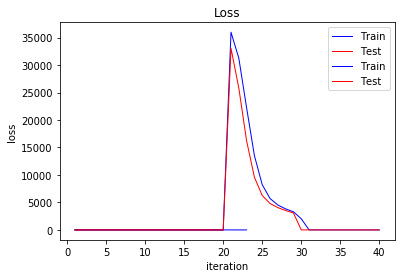

In [84]:
Model.fit(X, y, batchsize=10, n_epoch=10, n_units1=128, n_units2=128, tv_ratio=0.85, optimizerAlgorithm="Adam", savefigName="result.pdf", savemodelName="ListNet.model")

In [85]:
ans=Model.predict(X)

In [86]:
for i in ans:
    print(i[0])

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


In [ ]:
# for i in range(0,len(data[4])):
#     data[4][i]=convertToNumber(data[4][i])
# for i in range(0,len(data[5])):
#     data[5][i]=convertToNumber(data[5][i])
# for i in range(0,len(data[6])):
#     data[6][i]=convertToNumber(data[6][i])
# for i in range(0,len(data[7])):
#     data[7][i]=convertToNumber(data[7][i])
# for i in range(0,len(data[10])):
#     data[10][i]=convertToNumber(data[10][i])
# for i in range(0,len(data[11])):
#     data[11][i]=convertToNumber(data[11][i])
# for i in range(0,len(data[12])):
#     data[12][i]=convertToNumber(data[12][i])
# for i in range(0,len(data[13])):
#     data[13][i]=convertToNumber(data[13][i])
# for i in range(0,len(data[16])):
#     data[16][i]=convertToNumber(data[16][i])
# for i in range(0,len(data[17])):
#     data[17][i]=convertToNumber(data[17][i])
# plt.plot(data[0], data[4])
plt.plot(data[0], data[5])
plt.plot(data[0], data[6])
plt.plot(data[0], data[7])
plt.plot(data[0], data[10])
plt.plot(data[0], data[11])
plt.plot(data[0], data[12])
plt.plot(data[0], data[13])
plt.plot(data[0], data[16])
plt.plot(data[0], data[17])

In [ ]:
tutorial_soup = BeautifulSoup(driver.page_source, 'html.parser')
#tweet_boxes = tutorial_soup.find_all('div',attrs={'class':'css-1dbjc4n r-18u37iz r-thb0q2','data-testid':'tweet'})
tweet_boxes = tutorial_soup.find_all('div',{'class':'css-1dbjc4n r-1iusvr4 r-16y2uox r-1777fci r-5f2r5o r-1mi0q7o'})
len(tweet_boxes)
tweet_boxes[1].findChildren('div',recursive=False)[3].attrs.get('aria-label')
for i in range(0,len(tweet_boxes)):
    print(tweet_boxes[i].findChildren('div',recursive=False)[3].attrs.get('aria-label'))
#     tweet_boxes[i].findChildren('div',recursive=False)[3].attrs.get('aria-label')
box = tweet_boxes[2]
#small_boxes = box.find_all('div',{'class':'css-901oao r-hkyrab r-1qd0xha r-a023e6 r-16dba41 r-ad9z0x r-bcqeeo r-bnwqim r-qvutc0','lang':'en'})
if(box.find('img')):
    small_boxes = box.find('img')
    print(small_boxes)
boxes = tweet_boxes[2]
#boxes.text
#span = boxes.find_all('span',{'class':'css-901oao css-16my406 r-1qd0xha r-ad9z0x r-bcqeeo r-qvutc0'})
span = boxes.find_all('div',{'class':'css-901oao r-1awozwy r-1re7ezh r-6koalj r-1qd0xha r-a023e6 r-16dba41 r-1h0z5md r-ad9z0x r-bcqeeo r-o7ynqc r-clp7b1 r-3s2u2q r-qvutc0'})
span[4].text
#span[len(span)-1].text.isdigit()<div dir="ltr" class="">

In [39]:
from sklearn.linear_model import LinearRegression
logreg = LinearRegression()

In [76]:
logreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
np.array(training_Y).shape

In [ ]:
logreg.classes_

In [77]:
import random
# random.shuffle(training_X)
# x=logreg.predict(preprocessing.normalize(np.array(training_X)))
x=logreg.predict(X)

In [78]:
import scipy.stats as ss
y=ss.rankdata(x)
# np.array(y).shape

In [79]:
logreg.coef_

array([-5.29771350e+08, -6.06308316e+03, -6.11432973e+04,  7.89363738e+05,
       -4.10808570e+03,  2.59270021e+08,  1.79851194e+05, -1.70895608e+07,
        1.79313906e+06, -5.47331600e+03,  5.86611242e+08,  1.35739973e+07])

In [ ]:
['rank', 'Query', 'username', 'created_at', 'verified', 'followers_count', 'friends_count', 'listed_count', 'tweet', 'date', 'Img_present', 'likes', 'comments', 'retweets', 'tags', 'mentions', 'sum_followers_mention', 'url_count']

In [83]:
# for i in training_Y:
#     print(i)
ans=0;
for i in range(0,len(y)):
    print(y[i])
    ans=ans+(y[i]-training_Y[i])**2

1165.0
726.0
1109.0
2050.0
216.0
2031.0
1537.0
1174.0
223.0
443.0
4237.0
4099.0
4203.0
2188.0
2465.0
2272.0
90.0
910.0
783.0
1181.0
874.0
4244.0
4225.0
4213.0
659.0
3897.0
4248.0
1961.0
3365.0
4229.0
2578.0
2352.0
3.0
2631.0
537.0
2748.0
4245.0
4217.0
4132.0
4162.0
4206.0
4186.0
2037.0
4190.0
4240.0
4127.0
4184.0
2404.0
664.5
4169.0
664.5
383.0
815.0
840.0
1158.0
4215.0
1251.0
77.0
702.0
737.0
862.0
2284.0
1169.0
3071.0
4083.0
16.0
18.5
4242.0
2762.0
18.5
2756.0
1648.0
4234.0
618.0
4241.0
4187.0
2155.0
1348.0
1713.0
2938.0
4243.0
4246.0
3914.0
4239.0
2735.5
3783.0
4188.0
2461.0
1321.0
4133.0
3103.0
2735.5
1637.0
588.0
1168.0
4238.0
2485.0
4224.0
2320.0
4235.0
4134.0
2865.0
4208.0
2737.0
4060.0
4197.0
1536.0
2576.0
1361.0
4084.0
4175.0
761.0
4233.0
4232.0
2416.0
2332.0
4223.0
630.0
667.0
4202.0
2542.0
4161.0
3044.0
2647.0
4158.0
793.0
2856.0
4174.0
646.0
2118.0
3194.0
4049.0
4211.0
1156.0
4251.0
4207.0
2649.0
2572.0
2358.0
2708.0
1914.0
41.0
31.5
31.5
750.0
4194.5
4181.5
2033.5
4020.0
7

1378.0
2805.0
3689.0
1221.0
727.0
2061.0
2166.0
2994.0
3184.0
3912.0
1360.0
3057.0
3901.0
1210.0
3847.0
2934.0
1276.0
2979.0
3700.0
2165.0
3451.0
2266.0
725.0
1418.0
2842.0
3087.0
978.0
3772.0
1231.0
1303.0
697.0
2813.0
3147.0
2049.0
2008.0
1255.0
355.0
2987.0
284.0
1281.0
2172.0
4038.0
694.0
684.0
1868.5
2418.0
3068.0
1315.0
2167.0
3997.0
1918.0
2769.0
1868.5
3566.0
2619.0
1226.0
94.0
3715.0
3836.0
1241.0
1363.0
2071.0
3454.0
1261.0
3770.0
2726.0
3869.0
1971.5
1971.5
2810.0
2808.0
753.0
711.0
2149.0
1301.0
2058.0
363.0
2123.0
4100.0
1446.0
3444.0
715.0
1216.0
4048.0
1517.0
2945.0
2867.0
1314.0
803.0
3463.0
2135.0
2342.0
3557.0
3677.0
382.0
2400.0
3837.0
288.0
3201.0
593.0
3634.0
1238.0
3513.0
307.0
3055.0
575.0
3771.0
1926.0
389.0
3712.0
237.0
2702.0
1377.0
1386.0
3321.0
450.0
3642.0
544.0
3173.0
1379.0
4014.0
1949.0
2003.0
2815.0
2944.0
1650.0
4072.0
1286.0
2134.0
3831.0
3038.0
24.0
3043.0
624.0
2958.0
3993.0
1559.0
3977.0
2152.0
3814.0
1410.0
3702.0
4068.0
361.0
3582.0
789.0
1440.0


3434.0
1586.0
2029.0
1483.0
1641.0
1590.0
2589.0
3303.5
3303.5
2982.0
1201.0
2688.0
338.0
2105.0
861.0
296.0
3399.0
2763.0
2675.0
1965.0
398.0
3139.0
3180.0
1544.0
200.5
1529.0
1254.0
2030.0
3635.0
471.5
200.5
471.5
2963.0
2646.0
3486.0
2661.0
2018.0
1989.0
1579.0
3158.0
1593.0
2643.0
3981.0
2482.0
905.5
3086.0
1786.5
3014.0
1783.0
3742.0
1772.0
2886.0
905.5
1786.5
368.0
3151.0
1105.0
3658.0
1886.0
2104.0
4082.0
2803.0
3669.0
2103.0
1272.0
37.0
3637.0
4101.0
1591.0
2296.0
349.0
3699.0
283.0
2723.0
1806.0
434.0
2020.0
430.0
3768.0
3287.0
1832.0
3657.0
3781.0
2862.0
2026.0
411.0
1855.0
3175.0
1741.0
1123.0
1603.0
2654.0
3250.0
80.0
1964.0
3360.0
1616.0
1339.0
1775.0
2978.0
977.0
1794.0
1931.0
631.0
1976.0
1839.0
3458.0
3272.0
2302.0
1074.0
1860.0
1602.0
3122.0
3527.0
2021.0
431.0
3532.0
3732.0
3165.0
614.0
3517.0
3244.0
3794.0
2458.0
2715.0
1606.0
3183.0
2372.0
3738.0
3000.0
3246.0
3845.0
2569.0
2719.0
1986.0
2989.0
4021.0
1825.0
2022.0
826.0
2291.0
931.0
3406.0
829.0
3822.0
3412.0
1817.

In [81]:
ans/len(y)

2819561.643966126

In [ ]:
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)
clf = LogisticRegression(random_state=0).fit(X, y)

In [ ]:
clf.predict(X[:2, :])

In [ ]:
clf.classes_

In [ ]:
np.unique(y)